In [76]:
import requests
import collections
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline



In [77]:
from urllib.parse import urljoin
#相对路径转绝对路径
def absolute_urls(url,relative_url):
    return urljoin(url,relative_url)

In [78]:

def get_source_page_html(urls):
    headers = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}
    r = requests.get(urls, headers=headers).content.decode('utf8')
    return r

    
   

In [79]:
def list_stations(each_line_souce_page):
    ##很难用一种过滤方式找到正确的所有站点，这里用了笨的办法，用两种过滤方式，然后用Max,每条线取找到最多站点的。
    soup=BeautifulSoup(each_line_souce_page,'html.parser')
    eachline_stations_one=[]
    eachline_stations_two=[]
    eachline_stations=[]

    x=soup.find_all('table',attrs={'data-sort':'sortDisabled'})
    for table in x:
        title=table.find('caption')
        if title==None:continue
        if title.string==None:continue
        if title.string[-1]=="表":
            stationlist=table.find_all('a')
            for i in stationlist:
                if i.string==None:continue
                if i.string[-1] =='站':
                    eachline_stations_one.append(i.string)
    y=soup.find('table',attrs={'data-sort':'sortDisabled'})
    stationlist_two = y.find_all('a')
    for i in stationlist_two:
        if i.string == None: continue
        if i.string[-1] == '站':
            eachline_stations_two.append(i.string)
    return max(eachline_stations_one,eachline_stations_two,key=lambda k: len(k))


def find_lines_with_stations():
    lines_and_stations=collections.defaultdict(list)
    url='https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
    soup = BeautifulSoup(get_source_page_html(url), 'html.parser')
    table=soup.find('table',attrs={'width':'658'})
    lines=table.find_all('a')
    lines.pop()
    for line in lines:
        lines_and_stations[line.string]=list_stations(get_source_page_html(absolute_urls(url,(line.get('href')))))
    return lines_and_stations        
    

In [162]:
t=find_lines_with_stations()
t

defaultdict(list,
            {'北京地铁1号线': ['黑石头站',
              '高井站',
              '福寿岭站',
              '苹果园站',
              '古城站',
              '八角游乐园站',
              '八宝山站',
              '玉泉路站',
              '五棵松站',
              '万寿路站',
              '公主坟站',
              '军事博物馆站',
              '木樨地站',
              '南礼士路站',
              '复兴门站',
              '西单站',
              '天安门西站',
              '天安门东站',
              '王府井站',
              '东单站',
              '建国门站',
              '永安里站',
              '国贸站',
              '大望路站',
              '四惠站',
              '四惠东站'],
             '北京地铁2号线': ['西直门站',
              '积水潭站',
              '鼓楼大街站',
              '安定门站',
              '雍和宫站',
              '东直门站',
              '东四十条站',
              '朝阳门站',
              '建国门站',
              '北京站',
              '崇文门站',
              '前门站',
              '和平门站',
              '宣武门站',
              '长椿街站',
              '复兴门站',
              '阜成门站',
            

In [82]:
l=t.values()

In [83]:
allstations=[]
for i in l:
    for x in i:
        allstations.append(x)
        

In [84]:
allstations

['黑石头站',
 '高井站',
 '福寿岭站',
 '苹果园站',
 '古城站',
 '八角游乐园站',
 '八宝山站',
 '玉泉路站',
 '五棵松站',
 '万寿路站',
 '公主坟站',
 '军事博物馆站',
 '木樨地站',
 '南礼士路站',
 '复兴门站',
 '西单站',
 '天安门西站',
 '天安门东站',
 '王府井站',
 '东单站',
 '建国门站',
 '永安里站',
 '国贸站',
 '大望路站',
 '四惠站',
 '四惠东站',
 '西直门站',
 '积水潭站',
 '鼓楼大街站',
 '安定门站',
 '雍和宫站',
 '东直门站',
 '东四十条站',
 '朝阳门站',
 '建国门站',
 '北京站',
 '崇文门站',
 '前门站',
 '和平门站',
 '宣武门站',
 '长椿街站',
 '复兴门站',
 '阜成门站',
 '车公庄站',
 '天宫院站',
 '安河桥北站',
 '天宫院站',
 '生物医药基地站',
 '义和庄站',
 '黄村火车站',
 '黄村西大街站',
 '清源路站',
 '枣园站',
 '高米店南站',
 '高米店北站',
 '西红门站',
 '新宫站',
 '公益西桥站',
 '角门西站',
 '马家堡站',
 '北京南站',
 '陶然亭站',
 '菜市口站',
 '宣武门站',
 '西单站',
 '灵境胡同站',
 '西四站',
 '平安里站',
 '新街口站',
 '西直门站',
 '动物园站',
 '国家图书馆站',
 '魏公村站',
 '人民大学站',
 '海淀黄庄站',
 '中关村站',
 '北京大学东门站',
 '圆明园站',
 '西苑站',
 '北宫门站',
 '安河桥北站',
 '宋家庄站',
 '刘家窑站',
 '蒲黄榆站',
 '天坛东门站',
 '磁器口站',
 '崇文门站',
 '东单站',
 '灯市口站',
 '东四站',
 '张自忠路站',
 '北新桥站',
 '雍和宫站',
 '和平里北街站',
 '和平西桥站',
 '惠新西街南口站',
 '惠新西街北口站',
 '大屯路东站',
 '北苑路北站',
 '立水桥南站',
 '立水桥站',
 '天通苑南站',
 '天通苑站',
 '天通苑北站',
 '金安桥站',
 '苹果园站',
 '田村站',
 '海淀五路居站'

In [85]:
all_stations=set(allstations)
len(all_stations)

309

In [86]:
def distance(element1,element2):
    for sublist in l:
        if element1 in sublist and element2 in sublist:
            return abs(sublist.index(element1)-sublist.index(element2))
    

In [87]:
from collections import defaultdict
stations_connection=defaultdict(list)

for station_one in all_stations:
    for station_two in all_stations:
        if station_one==station_two:continue
        if distance(station_one,station_two)==1:
            stations_connection[station_one].append(station_two)
##得到graph，所有站连接的图
stations_connection
            


defaultdict(list,
            {'大郊亭站': ['九龙山站', '百子湾站'],
             '霍营站': ['育新站', '建材城东路站', '回龙观东大街站', '回龙观站'],
             '泥洼站': ['西局站', '丰台站'],
             '白石桥南站': ['国家图书馆站', '二里沟站', '白堆子站', '花园桥站'],
             '知春里站': ['知春路站', '海淀黄庄站'],
             '北京西站': ['湾子站', '六里桥东站', '军事博物馆站'],
             '奥林匹克公园站': ['北沙滩站', '森林公园南门站', '安立路站', '奥体中心站'],
             '车公庄站': ['阜成门站', '车公庄西站', '平安里站'],
             '双合站': ['焦化厂站', '垡头站'],
             '丽泽商务区站': ['北京南站', '西局站'],
             '丰台科技园站': ['郭公庄站', '科怡路站'],
             '草桥站': ['纪家庙站', '角门西站'],
             '物资学院路站': ['通州北关站', '草房站'],
             '四惠站': ['大望路站', '四惠东站'],
             '大葆台站': ['郭公庄站', '稻田站'],
             '平乐园站': ['九龙山站', '北工大西门站'],
             '阜通站': ['望京站', '望京南站'],
             '北京南站': ['丽泽商务区站', '陶然桥站', '陶然亭站', '马家堡站'],
             '大瓦窑站': ['郭庄子站', '园博园站'],
             '通州北关站': ['物资学院路站', '通运门站'],
             '太阳宫站': ['三元桥站', '芍药居站'],
             '大红门站': ['海户屯站', '角门东站', '石榴庄站', '大红门南站'],
        

/Users/kaifeng/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


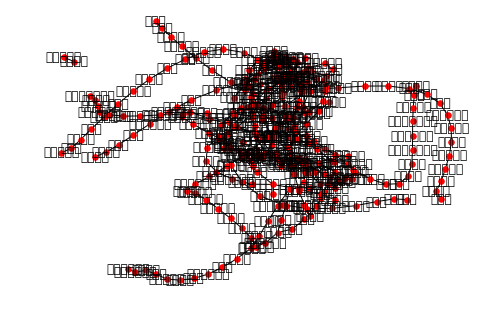

In [88]:

stations_connection_graph=nx.Graph(stations_connection)
nx.draw(stations_connection_graph,with_labels=True,node_size=30)


In [142]:
def search_destination(graph, start, get_succsssors, is_goal_predicate, strategy_func):
    pathes = [[start]]
    seen = set()
    chosen_pathes = []
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in seen: continue
            
        for city in get_succsssors(frontier, graph):
            if city in path: continue # remove the loop
            new_path = path + [city]
            pathes.append(new_path)
            if is_goal_predicate(city): return new_path
        
        pathes = strategy_func(pathes)
        seen.add(frontier)
    return chosen_pathes


In [143]:
def get_succsssors(froninter, graph):
    return graph[froninter]

In [153]:
def is_goal(node, destination): 
    return node ==  destination

In [154]:
def sort_pathes(pathes, func,beam):
    return sorted(pathes, key=func)[:beam]

In [155]:
#这里假设每组相邻站之间距离差不多
def shortest_path_priority(pathes):
    return sort_pathes(pathes, lambda p:len(p), beam=30)

In [156]:
#最少换乘地铁，用path里相隔两个位置的元素判断
def mininum_change_station(pathes):
    return sort_pathes(pathes, lambda p: number_lines(p), beam=30)

In [157]:
def comprehensive_sort(pathes):
    return sort_pathes(pathes, lambda p: (len(p) + number_lines(p)), beam=30)

In [158]:
def number_lines(path):
    lines=0
    if len(path)==2:return 0
    for i in range(len(path)-1):
        if i==0:continue
        lines+=line_transfer(path[i-1],path[i+1])
    return lines

def line_transfer(a,b):
    for sublist in l:
        if a in sublist and b in sublist:return 0
    return 1

    
    
    
  
   
        
        

In [159]:
search_destination(stations_connection_graph,'首经贸站',get_succsssors, lambda n: n =='西二旗站',mininum_change_station)

['首经贸站',
 '纪家庙站',
 '草桥站',
 '角门西站',
 '角门东站',
 '大红门站',
 '石榴庄站',
 '宋家庄站',
 '成寿寺站',
 '分钟寺站',
 '十里河站',
 '潘家园站',
 '劲松站',
 '双井站',
 '国贸站',
 '金台夕照站',
 '呼家楼站',
 '团结湖站',
 '农业展览馆站',
 '亮马桥站',
 '三元桥站',
 '太阳宫站',
 '芍药居站',
 '望京西站',
 '北苑站',
 '立水桥站',
 '建材城东路站',
 '霍营站',
 '回龙观站',
 '龙泽站',
 '西二旗站']

In [160]:
search_destination(stations_connection_graph,'首经贸站',get_succsssors, lambda n: n =='西二旗站',shortest_path_priority)

['首经贸站',
 '丰台站',
 '泥洼站',
 '西局站',
 '六里桥站',
 '莲花桥站',
 '公主坟站',
 '军事博物馆站',
 '白堆子站',
 '白石桥南站',
 '国家图书馆站',
 '动物园站',
 '西直门站',
 '大钟寺站',
 '知春路站',
 '五道口站',
 '清华东路西口站',
 '上地站',
 '清河站',
 '西二旗站']

In [161]:
search_destination(stations_connection_graph,'首经贸站',get_succsssors, lambda n: n =='西二旗站',comprehensive_sort)

['首经贸站',
 '丰台站',
 '泥洼站',
 '西局站',
 '六里桥站',
 '莲花桥站',
 '公主坟站',
 '军事博物馆站',
 '白堆子站',
 '白石桥南站',
 '国家图书馆站',
 '动物园站',
 '西直门站',
 '大钟寺站',
 '知春路站',
 '五道口站',
 '清华东路西口站',
 '上地站',
 '清河站',
 '西二旗站']